### Figure 3.1 

In [39]:
import operator
from random import sample
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
from sklearn.neighbors import KNeighborsRegressor
from math import exp

In [19]:
def p(x): 
  return (2 + x + 3* (x ** 2))

def pp(x): 
  y = np.zeros((len(x)))
  for i in range(len(x)):
    y[i] = 2 + x[i] + 3* (x[i] ** 2)
  return y

x = np.random.uniform(low = -1, size = 1000)
y = p(x) + np.random.normal(0, 0.5, 1000)
#plt.scatter(x,y, marker = 'x' )
#plt.show()

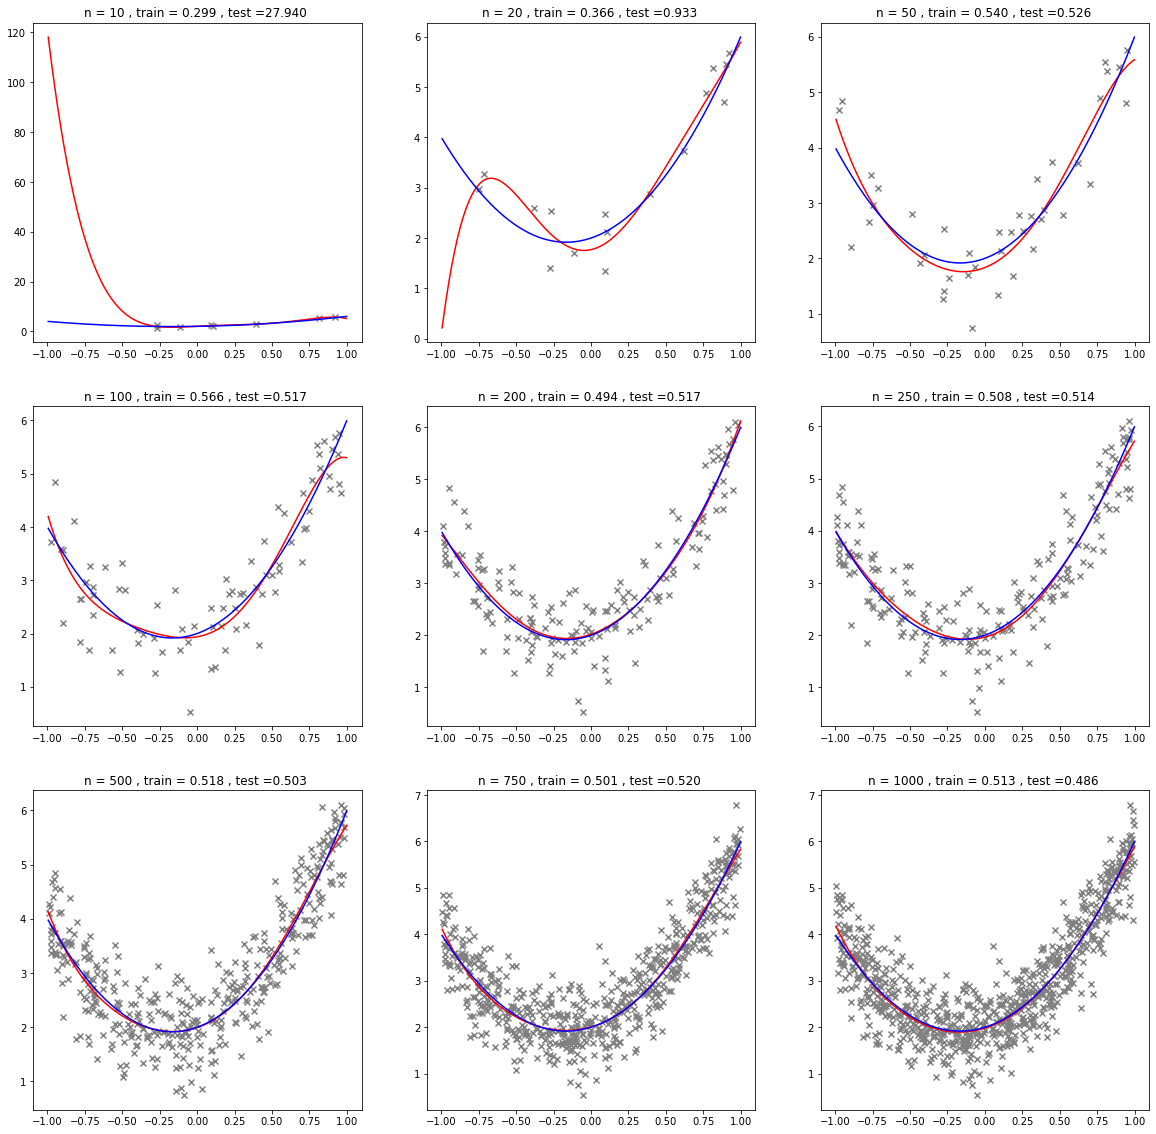

In [20]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

fig, axs = plt.subplots(3, 3,figsize=(20, 20))
axs = axs.ravel() #to flatten the axis array
 
numbers =[10,20,50,100,200,250,500,750,1000]
errors = np.zeros((len(numbers),2))

for i in range(len(numbers)) :
  n = numbers[i] 
  #Split train/test
  ntrain = int(0.8*n)  
  indices = sample(range(n),ntrain)

  xtrain = x[indices]
  xtest = np.delete(x,indices)
  ytrain = y[indices]
  ytest = np.delete(y,indices)

  xtrain= xtrain.reshape(-1, 1)
  xtest =  xtest.reshape(-1, 1)
  xtilde =  x.reshape(-1, 1)

  #Make prediction for train
  polynomial_features= PolynomialFeatures(degree=5)
  x_polytr = polynomial_features.fit_transform(xtrain)
  x_polyte = polynomial_features.fit_transform(xtest)
  x_poly = polynomial_features.fit_transform(xtilde)

  model = LinearRegression()
  model.fit(x_polytr, ytrain)
  y_poly_pred_train = model.predict(x_polytr)
  y_poly_pred_test = model.predict(x_polyte)
  y_poly_pred = model.predict(x_poly)

  train_error = np.sqrt(mean_squared_error(ytrain,y_poly_pred_train))
  test_error = np.sqrt(mean_squared_error(ytest,y_poly_pred_test))
  #train_error = np.abs(np.mean(ytrain-y_poly_pred_train))
  #test_error = np.abs(np.mean(ytest-y_poly_pred_test))

  errors[i,0] =  train_error
  errors[i,1] =  test_error

  axs[i].scatter(x = xtrain, y = ytrain,marker = 'x', color = "grey")

  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(xtilde,y_poly_pred), key=sort_axis)

  xtilde, y_poly_pred = zip(*sorted_zip)

  axs[i].plot(xtilde, y_poly_pred, label = "test", color = "r")
  axs[i].plot(xtilde, pp(xtilde), color = "blue" )
  axs[i].set_title('n = %d , train = %.3f , test =%.3f ' %(n,train_error,test_error))

plt.savefig("Figure3.1_KOPP.png")
plt.show()

### Figure 3.2

In [21]:
# Random Design 

import numpy as np
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt


sigma2 = 0.25

excess_risk = []
std_dev = []

n_tot = 10**5
step = (10000**(1/17))
n_obs = [int(10 * step ** i) for i in range(18)]

theta_star = np.array([-1/2,1/4,1,1/6,1/8,-1/3])
d = 6

x = np.random.uniform(0,1,n_tot) # all observations

nb_rep = 32 

for n in n_obs :
    
    curr_xs = [] #  all excess risks for current n 
    x_n = x[:n] # current observations
    
    for i in range (nb_rep): # 32 replications
        
        noise = np.random.normal(0,sigma2,n) # random noise 
        
        phi = np.c_[np.ones(n), x_n, np.square(x_n), np.power(x_n, 3),np.power(x_n, 4),np.power(x_n, 5)] # Design matrix 
        sigma_hat = 1/n * np.dot(phi.T, phi)

        y = np.dot(phi, theta_star) + noise # target variable 
        
        reg = LinearRegression().fit(phi, y) # prédiction 
        
        theta_hat = reg.coef_
        theta_hat[0] = reg.intercept_

        x_new = np.random.uniform(0,1) # new observation on which we want a prediction of y 

        phi_x = np.array([[x_new**k for k in range(d)]]).T
        sigma = np.dot(phi_x, phi_x.T)
        xsr = sigma2/n * np.trace(np.dot(sigma, np.linalg.inv(sigma_hat)))

        curr_xs.append(xsr)
    
    excess_risk.append(np.mean(curr_xs))
    std_dev.append(np.std(curr_xs))

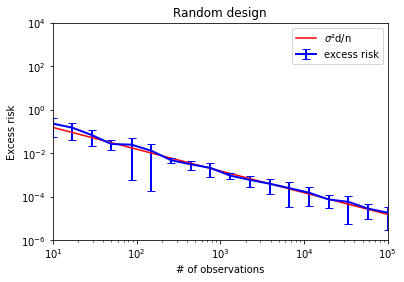

In [22]:
# Plot
fig = plt.loglog(10)
a = np.linspace(10,n_tot, 1000)
plt.plot(a, [sigma2*d/i for i in a], 'red', label=r'$\sigma² $d/n')
plt.xlim(10,10**5)
plt.ylim(10**(-6),10**4)
plt.title('Random design')
plt.ylabel('Excess risk')
plt.xlabel("# of observations")
plt.errorbar(n_obs, excess_risk, yerr = std_dev, fmt = '-', capsize = 4, color = 'blue', linewidth = 2, label = "excess risk")
plt.legend()
plt.savefig("Figure3.2_KOPP.png")

### Figure p.90

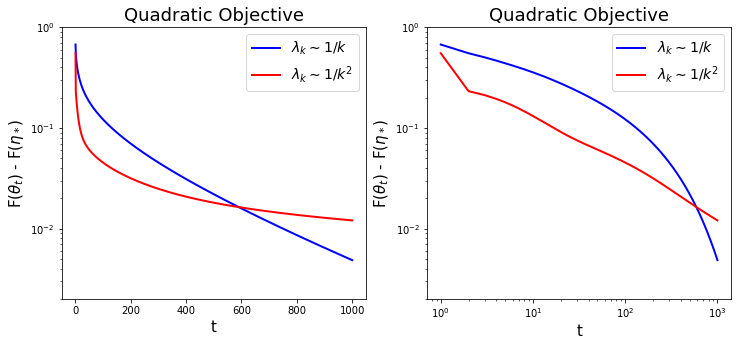

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from math import *
import time as ti
from sklearn.neighbors import KNeighborsRegressor

n = 1000
d = 1000

#np.random.seed(0)

#je laisse comme ça car sinon j'ai du mal à trouver une bonne seed :
theta1 = np.random.randn(n, 1) * 0
theta2 = theta1 * 1.
#l'arnaque, c'est d'utiliser des feature matrices diagonales :
H1 = np.diag([1 / (k + 1) for k in range(d)]) / n
X1 = np.sqrt(H1 * n)
H2 = np.diag([1 / (k + 1) ** 2 for k in range(d)]) / n
X2 = np.sqrt(H2 * n)
eta = np.random.randn(d, 1)

y1 = X1.dot(eta)
y2 = X2.dot(eta * 2.5)
L = 1 / 1 / n
gam =  1 / L
T = 1000

loss1 = []
loss2 = []

for i in range(T):
    loss1.append(.5 / n * (X1.dot(theta1) - y1).T.dot((X1.dot(theta1) - y1)).sum() * 200)
    loss2.append(.5 / n * (X2.dot(theta2) - y2).T.dot((X2.dot(theta2) - y2)).sum() * 200)
    theta1 -= gam * (H1.dot(theta1) - X1.dot(y1) / n)
    theta2 -= gam * (H2.dot(theta2) - X2.dot(y2) / n)

fig, axs = plt.subplots(1, 2, figsize = (12, 5))

for i in range(2):
    ax = axs.flat[i]
    ax.set_title("Quadratic Objective", fontsize = 18)
    ax.set_ylim(10 ** -2/5, 1)
    ax.set_ylabel(r"F($\theta_t$) - F($\eta_*$)", fontsize = 15)
    ax.set_xlabel("t", fontsize = 15)

ax = axs.flat[0]
ax.semilogy(np.arange(1, T + 1), loss1, c = "blue", linewidth = 2, label = r"$\lambda_k \sim 1/k$")
ax.semilogy(np.arange(1, T + 1), loss2, c = "red", linewidth = 2, label = r"$\lambda_k \sim 1/k^2$")
ax.legend(fontsize = 14)

ax = axs.flat[1]
ax.loglog(np.arange(1, T + 1), loss1, c = "blue", linewidth = 2, label = r"$\lambda_k \sim 1/k$")
ax.loglog(np.arange(1, T + 1), loss2, c = "red", linewidth = 2, label = r"$\lambda_k \sim 1/k^2$")
ax.legend(fontsize = 14)


plt.savefig("Figurep90_KOPP.png")
plt.show()

### Figure p.108

In [24]:
def norm2(b):
    return np.sum(b ** 2)

n = 1000
d = 5
R = 10
T = 1000

eta = np.random.randn(d, 1)
X = np.random.uniform(-R, R, (n, d))
y = np.sign(X.dot(eta))

mu1 = .001
mu2 = .1
reg1 = mu1 / 2 * np.sum(eta ** 2)
reg2 = mu2 / 2 * np.sum(eta ** 2)

theta1_mu1 = np.zeros((d, 1))
theta2_mu1 = np.zeros((d, 1))
theta1_mu2 = np.zeros((d, 1))
theta2_mu2 = np.zeros((d, 1))
loss1_mu1 = []
loss2_mu1 = []
loss1_mu2 = []
loss2_mu2 = []

for t in range(1, T + 1):
    
    loss1_mu1.append(.5 / n * np.sum(np.maximum(0, 1 - y * X.dot(theta1_mu1))) + mu1 / 2 * norm2(theta1_mu1))
    loss2_mu1.append(.5 / n * np.sum(np.maximum(0, 1 - y * X.dot(theta2_mu1))) + mu1 / 2 * norm2(theta2_mu1))
    loss1_mu2.append(.5 / n * np.sum(np.maximum(0, 1 - y * X.dot(theta1_mu2))) + mu2 / 2 * norm2(theta1_mu2))
    loss2_mu2.append(.5 / n * np.sum(np.maximum(0, 1 - y * X.dot(theta2_mu2))) + mu2 / 2 * norm2(theta2_mu2))
    
    gam1 = 1 / (R ** 2 * np.sqrt(t))
    gam2_mu1 = 1 / (mu1 * t)
    gam2_mu2 = 1 / (mu2 * t)
    i = np.random.randint(n)
    theta1_mu1 -= gam1 * (mu1 * theta1_mu1 + .5 * (-y.T * X.T * (X.dot(theta1_mu1) * y < 1).T)[:, i].reshape(-1, 1))
    theta2_mu1 -= gam2_mu1 * (mu1 * theta2_mu1 + .5 * (-y.T * X.T * (X.dot(theta2_mu1) * y < 1).T)[:, i].reshape(-1, 1))
    theta1_mu2 -= gam1 * (mu2 * theta1_mu2 + .5 * (-y.T * X.T * (X.dot(theta1_mu2) * y < 1).T)[:, i].reshape(-1, 1))
    theta2_mu2 -= gam2_mu2 * (mu2 * theta2_mu2 + .5 * (-y.T * X.T * (X.dot(theta2_mu2) * y < 1).T)[:, i].reshape(-1, 1))

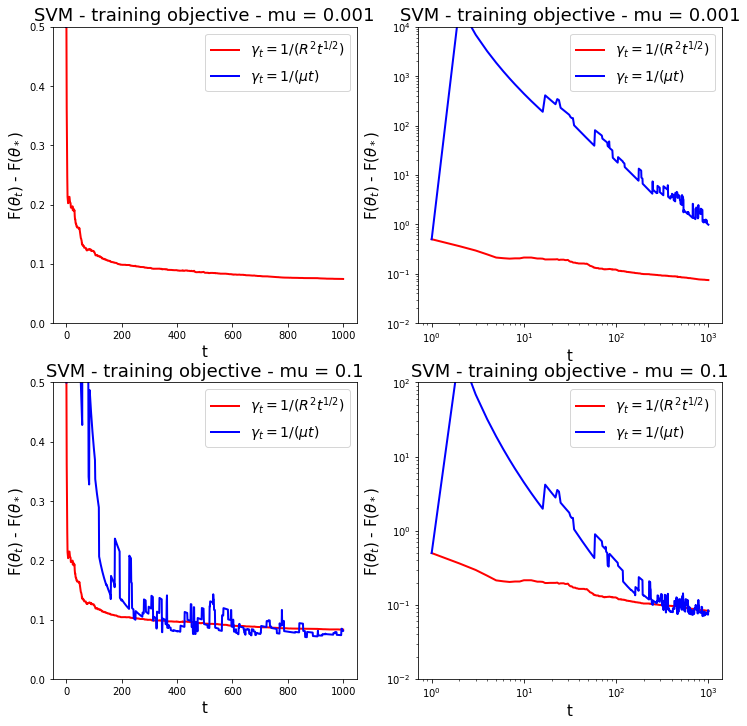

In [27]:
import matplotlib.ticker as ticker
fig, axs = plt.subplots(2, 2, figsize = (12, 12))

ax = axs.flat[0]
ax.set_title("SVM - training objective - mu = 0.001", fontsize = 18)
ax.plot(np.arange(1, T + 1), loss1_mu1, c = "red", linewidth = 2, label = "$\gamma_t=1/(R^2t^{1/2})$")
ax.plot(np.arange(1, T + 1), loss2_mu1, c = "blue", linewidth = 2, label = "$\gamma_t=1/(\mu t)$")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.set_ylim(0, .5)
ax.set_ylabel(r"F($\theta_t$) - F($\theta_*$)", fontsize = 15)
ax.set_xlabel("t", fontsize = 15)
ax.legend(fontsize = 14)

ax = axs.flat[2]
ax.set_title("SVM - training objective - mu = 0.1", fontsize = 18)
ax.plot(np.arange(1, T + 1), loss1_mu2, c = "red", linewidth = 2, label = "$\gamma_t=1/(R^2t^{1/2})$")
ax.plot(np.arange(1, T + 1), loss2_mu2, c = "blue", linewidth = 2, label = "$\gamma_t=1/(\mu t)$")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.set_ylim(0, .5)
ax.set_ylabel(r"F($\theta_t$) - F($\theta_*$)", fontsize = 15)
ax.set_xlabel("t", fontsize = 15)
ax.legend(fontsize = 14)

ax = axs.flat[1]
ax.set_title("SVM - training objective - mu = 0.001", fontsize = 18)
ax.loglog(np.arange(1, T + 1), loss1_mu1, c = "red", linewidth = 2, label = "$\gamma_t=1/(R^2t^{1/2})$")
ax.loglog(np.arange(1, T + 1), loss2_mu1, c = "blue", linewidth = 2, label = "$\gamma_t=1/(\mu t)$")
ax.set_ylim(1e-2, 1e4)
ax.set_ylabel(r"F($\theta_t$) - F($\theta_*$)", fontsize = 15)
ax.set_xlabel("t", fontsize = 15)
ax.legend(fontsize = 14)

ax = axs.flat[3]
ax.set_title("SVM - training objective - mu = 0.1", fontsize = 18)
ax.loglog(np.arange(1, T + 1), loss1_mu2, c = "red", linewidth = 2, label = "$\gamma_t=1/(R^2t^{1/2})$")
ax.loglog(np.arange(1, T + 1), loss2_mu2, c = "blue", linewidth = 2, label = "$\gamma_t=1/(\mu t)$")
ax.set_ylim(1e-2, 1e2)
ax.set_ylabel(r"F($\theta_t$) - F($\theta_*$)", fontsize = 15)
ax.set_xlabel("t", fontsize = 15)
ax.legend(fontsize = 14)


plt.savefig("Figurep108_KOPP.png")
plt.show()

### Figure 6.2

In [31]:
def f(x): #regressogram function 
  i=0
  while not(x>=Aj[i] and x<Aj[i+1]): #Compute in which partition set x is 
    if not(i==j-1 and x==Aj[i+1]): i=i+1
    else: break 
 
  if math.isnan(np.mean(y[np.where(np.logical_and(X>Aj[i], X<Aj[i+1]))])): #is there is no data point is this set return 1:n (convention)
    return 1/n
  return np.mean(y[np.where(np.logical_and(X>Aj[i], X<Aj[i+1]))]) #else return the mean of the data points in the set

/Users/emmakopp/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/emmakopp/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/emmakopp/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/emmakopp/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


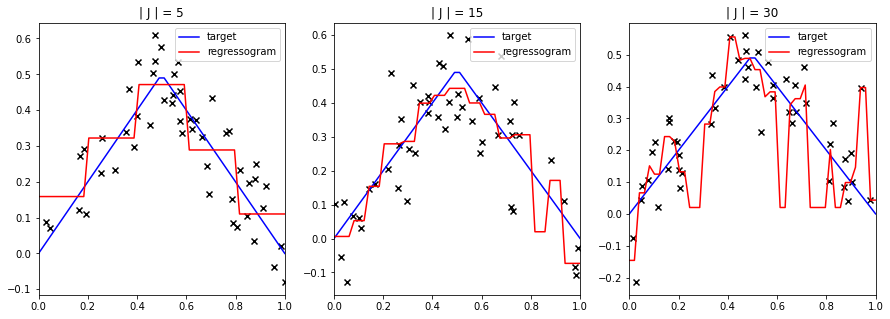

In [33]:
J = [5,15,30]
ii=0
n=50

fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs = axs.ravel()
for j in J:
  X = np.random.uniform(low=0.0, high=1.0, size= n )            
  eps = np.random.normal(loc=0.0, scale=0.1, size= n )
        
  Y_mean = np.where(X < 0.5, X, -X+1) #the actual model
  y = Y_mean + eps 
  Aj= np.linspace(0,1,j+1) #Set Partitions 
  xt = np.linspace(start = 0, stop =1, num= n)
  regr = [f(x) for x in xt] #Regressogram function

        # Plot results
  
  axs[ii].scatter(x = X, y = y, marker = 'x',color="black") #Plot the real points
  axs[ii].plot(xt, np.where(xt < 0.5, xt, -xt+1), label='target', color = "blue") #Plot the target

  axs[ii].plot(xt,regr, label = "regressogram", color = "red") #Plot the regressogram
  axs[ii].set_title('| J | = %d'%(j))
  axs[ii].set_xlim(0,1)
  axs[ii].legend(loc=1)
  ii+=1

plt.savefig("Figurep6.2_KOPP.png")

### Figure 6.3

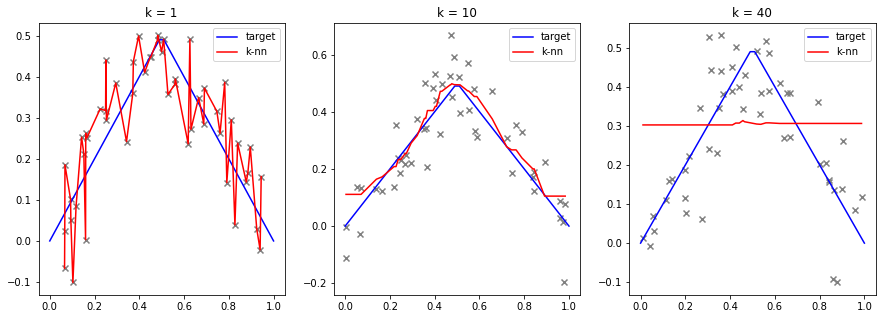

In [38]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs = axs.ravel()

list_k =  [1,10,40]
i = 0
n = 50

for k in list_k:
        # Generate (x,y)
        x = np.random.uniform(low=0.0, high=1.0, size= n )            
        eps = np.random.normal(loc=0.0, scale=0.1, size= n )
        
        Y_mean = np.where(x < 0.5, x, -x+1) #the actual model
        y = Y_mean + eps 
         
        # Fit to the model
        model = KNeighborsRegressor(n_neighbors= int(k) ) #We use k-nn method
        model.fit(x.reshape(-1, 1), y)
        pred = model.predict(x.reshape(-1, 1))

        # Plot results
        xt = np.linspace(start = 0, stop =1, num= n)
        axs[i].scatter(x = x, y = y,marker = 'x', color = "grey") #Plot the real points
        axs[i].plot(xt, np.where(xt < 0.5, xt, -xt+1), label='target', color = "blue") #Plot the actual model
        
        # Sort the values of x before k-nn plot 
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x,pred), key=sort_axis)
        x, pred = zip(*sorted_zip)

        axs[i].plot(x, pred, label = "k-nn", color = "red") #Plot the k-nn model


 
        axs[i].set_title('k = %d'%(k))
        axs[i].legend() 
        i+=1

plt.savefig("Figurep6.3_KOPP.png")

### Figure 6.4